<a href="https://colab.research.google.com/github/eliseobao/redsm5/blob/main/analysis/linguistic/plutchik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plutchik set of emotions 

In [92]:
!pip install matplotlib textblob nrclex
!python3 -m textblob.download_corpora


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from nrclex import NRCLex

In [94]:
SYMPTOMS = [
    # "NO_SYMPTOMS",
    # "DEPRESSED_MOOD",
    "ANHEDONIA",
    # "APPETITE_CHANGE",
    "SLEEP_ISSUES",
    # "PSYCHOMOTOR",
    # "FATIGUE",
    "WORTHLESSNESS",
    # "COGNITIVE_ISSUES",
    "SUICIDAL_THOUGHTS",
]

In [95]:
data = pd.read_csv("data/redsm5.csv")

texts_per_symptom = {}
for symptom in SYMPTOMS:
    texts_per_symptom[symptom] = data.loc[
        data["labels"].str.contains(symptom), "text"
    ].tolist()

In [96]:
emotions_per_symptom = {}
for symptom, texts in texts_per_symptom.items():
    emotions_per_symptom[symptom] = NRCLex(" ".join(texts))

In [97]:
results = {}
for symptom, emotions in emotions_per_symptom.items():
    blob = TextBlob(" ".join(texts_per_symptom[symptom]))
    sentences = list(blob.sentences)
    results[symptom] = {
        "blob": blob,
        "sentences": sentences,
        "emotion_percentage": {
            key: value / len(sentences)
            for key, value in emotions.raw_emotion_scores.items()
        },
    }

In [98]:
results_sorted = {}
for symptom, result in results.items():
    results_sorted[symptom] = list(
        dict(
            sorted(result["emotion_percentage"].items(), key=lambda item: item[0])
        ).values()
    )

In [99]:
import numpy as np
import matplotlib.pyplot as plt

def radar_plot(results_sorted, title):
    # 1. Define and sort categories
    categories = sorted([
        "fear", "anger", "anticipation", "trust", "surprise",
        "positive", "negative", "sadness", "disgust", "joy"
    ])
    num_categories = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
    angles += angles[:1]

    # 2. Create polar figure
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

    # 3. Cubehelix palette avoiding near-white extremes
    num_series = len(results_sorted)
    cmap = plt.cm.get_cmap('cubehelix')
    positions = np.linspace(0.2, 0.8, num_series)
    colors = [cmap(pos) for pos in positions]

    # 4. Optional line styles for contrast
    line_styles = ['solid', 'dashed', 'dashdot', 'dotted'] * ((num_series // 4) + 1)

    # 5. Plot each symptom
    for idx, (symptom, values) in enumerate(results_sorted.items()):
        data = values + values[:1]
        color = colors[idx]
        style = line_styles[idx]
        label = symptom.lower().replace("_", r"\ ")

        ax.plot(
            angles,
            data,
            linewidth=2,
            linestyle=style,
            color=color,
            alpha=0.9,
            label=f"$\\it{{{label}}}$"
        )
        ax.fill(
            angles,
            data,
            color=color,
            alpha=0.2
        )

    # 6. Ticks and grid
    ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=14)
    plt.yticks(
        [0.2, 0.4, 0.6, 0.8],
        ["20%", "40%", "60%", "80%"],
        color="grey",
        size=12
    )
    ax.set_ylim(0, 0.8)

    # 7. Title and legend
    # ax.set_title(title, y=1.08, fontsize=16)
    ax.legend(
        loc="lower center",
        bbox_to_anchor=(0.5, -0.3),
        ncol=min(num_series, 2),
        fontsize=12,
        frameon=False
    )

    # 8. Save and show
    plt.tight_layout()
    plt.savefig("analysis/visuals/plutchik.pdf", bbox_inches="tight", dpi=300)
    plt.show()


/tmp/ipykernel_894/3764326644.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('cubehelix')


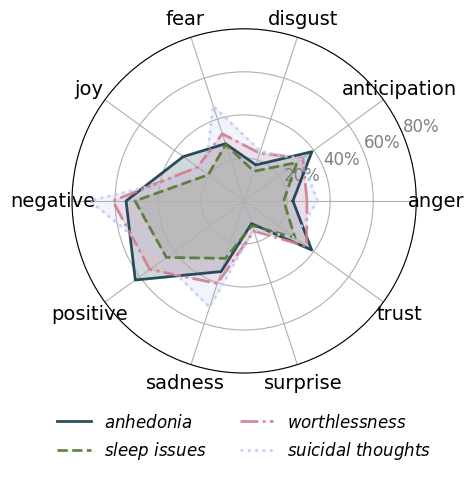

In [100]:
radar_plot(results_sorted, "ReDSM5 Emotions")